# Unit 5 - Financial Planning

In [1]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecast import MCSimulation
from alpaca_trade_api.rest import REST, TimeFrame

%matplotlib inline

In [2]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [3]:
# Set current amount of crypto assets
btc = 1.2
eth = 5.3

In [4]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [5]:
# Fetch current BTC price
btc_price = requests.get(btc_url)
btc_repsonse = btc_price.content
btc_data = btc_price.json()
btc_price = btc_data["data"]["1"]["quotes"]["USD"]["price"]

# Fetch current ETH price
eth_price = requests.get(eth_url)
eth_repsonse = eth_price.content
eth_data = eth_price.json()
eth_price = eth_data["data"]["1027"]["quotes"]["USD"]["price"]


# Compute current value of my crpto
btc_value = btc * btc_price
eth_value = eth * eth_price



# Print current crypto wallet balance
print(f"The current value of your {btc} BTC is ${btc_value:0.2f}")
print(f"The current value of your {eth} ETH is ${eth_value:0.2f}")

The current value of your 1.2 BTC is $27687.60
The current value of your 5.3 ETH is $8747.23


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [6]:
# Set current amount of shares
my_agg = 200
my_spy = 50

In [7]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Create the Alpaca API object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")


In [8]:
today = pd.Timestamp("2022-08-02", tz="America/New_York").isoformat()

In [9]:
# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

In [10]:
# Get current closing prices for SPY and AGG
df_closing = alpaca.get_bars(
    tickers,
    timeframe,
    limit=1000,
    start = today
).df

# Preview DataFrame
df_closing

,open,high,low,close,volume,trade_count,vwap,symbol
timestamp,,,,,,,,
2022-08-02 04:00:00+00:00,104.27,104.345,103.17,103.1900,5453620,34294,103.614116,AGG
2022-08-02 04:00:00+00:00,409.03,413.000,406.82,409.3686,50973412,457609,409.927973,SPY


In [11]:
#AGG = df_investments[df_investments['symbol']=='AGG'].drop('symbol', axis=1)
AGG = df_closing[df_closing['symbol']=='AGG'].drop('symbol', axis=1)
AGG

,open,high,low,close,volume,trade_count,vwap
timestamp,,,,,,,
2022-08-02 04:00:00+00:00,104.27,104.345,103.17,103.19,5453620,34294,103.614116


In [12]:
SPY = df_closing[df_closing['symbol']=='SPY'].drop('symbol', axis=1)
SPY

,open,high,low,close,volume,trade_count,vwap
timestamp,,,,,,,
2022-08-02 04:00:00+00:00,409.03,413.0,406.82,409.3686,50973412,457609,409.927973


In [13]:
df_closing = pd.concat([AGG, SPY], axis=1, keys=["AGG", "SPY"])
df_closing

AGG                                    \
                             open     high     low   close   volume   
timestamp                                                             
2022-08-02 04:00:00+00:00  104.27  104.345  103.17  103.19  5453620   

                                                      SPY                 \
                          trade_count        vwap    open   high     low   
timestamp                                                                  
2022-08-02 04:00:00+00:00       34294  103.614116  409.03  413.0  406.82   

                                                                       
                              close    volume trade_count        vwap  
timestamp                                                              
2022-08-02 04:00:00+00:00  409.3686  50973412      457609  409.927973

In [14]:
# Pick AGG and SPY close prices
agg_close_price = float(df_closing["AGG"]["close"][0])
spy_close_price = float(df_closing["SPY"]["close"][0])



# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $103.19
Current SPY closing price: $409.3686


In [15]:
# Compute the current value of shares
my_spy_value = my_spy * spy_close_price
my_agg_value = my_agg * agg_close_price

# Print current value of shares
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $20468.43
The current value of your 200 AGG shares is $20638.00


### Savings Health Analysis

In [16]:
# Set monthly household income

income_mnth = 12000

# Consolidate financial assets data
save_data=[
    btc_value + eth_value,
    my_spy_value + my_agg_value,
]

# Create savings DataFrame
saving_df = pd.DataFrame(save_data, columns=["amount"], index=["crypto", "shares"])

# Display savings DataFrame
display(saving_df)

,amount
crypto,36434.826
shares,41106.430


<AxesSubplot:title={'center':'Composition of Personal Savings'}, ylabel='amount'>

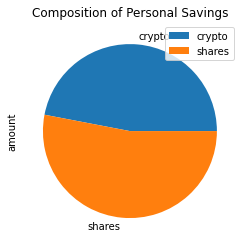

In [17]:
# Plot savings pie chart
saving_df.plot.pie(y="amount", title="Composition of Personal Savings")

In [18]:
# Set ideal emergency fund
emergency_fund = income_mnth * 3

# Calculate total amount of savings
total_savings = float(saving_df.sum())

# Validate saving health
if total_savings > emergency_fund:
    print("Congratulations! You have enough money in your emergency fund")
elif total_savings==emergency_fund:
    print("Great, You have saved three times your monthly expenses! Keep pushing to increase your savings")
else: 
    print("You are ${(emergency_fund - total_savings):0.2f} away from your emergency fund goal, continue saving between 10% and 20% of your monthly income to reach your goal.")

Congratulations! You have enough money in your emergency fund


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [26]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2017-08-02', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2022-08-02', tz='America/New_York').isoformat()

In [32]:
# Get 5 years' worth of historical data for SPY and AGG
# (use a limit=1000 parameter to call the most recent 1000 days of data)
df_stock_data = alpaca.get_bars(
    tickers,
    timeframe,
    start=start_date,
    end=end_date,
    limit=3000
).df


# Display sample data
df_stock_data

,open,high,low,close,volume,trade_count,vwap,symbol
timestamp,,,,,,,,
2017-08-02 04:00:00+00:00,109.71,109.77,109.6400,109.64,2253372,8484,109.700965,AGG
2017-08-03 04:00:00+00:00,109.77,109.94,109.7400,109.86,1485193,8740,109.830663,AGG
2017-08-04 04:00:00+00:00,109.70,109.72,109.5350,109.68,2300875,10411,109.656104,AGG
2017-08-07 04:00:00+00:00,109.69,109.72,109.6066,109.67,2359826,7755,109.674876,AGG
2017-08-08 04:00:00+00:00,109.67,109.69,109.5000,109.57,2570876,12663,109.577636,AGG
...,...,...,...,...,...,...,...,...
2022-07-27 04:00:00+00:00,394.43,402.88,394.0500,401.04,81319074,587430,398.307462,SPY
2022-07-28 04:00:00+00:00,401.84,406.80,398.1500,406.07,73966563,570079,403.644305,SPY
2022-07-29 04:00:00+00:00,407.70,413.02,406.7700,411.99,86779944,544810,410.668581,SPY


In [33]:
SPY = df_stock_data[df_stock_data['symbol']=='SPY'].drop('symbol', axis=1)
SPY

,open,high,low,close,volume,trade_count,vwap
timestamp,,,,,,,
2017-08-02 04:00:00+00:00,247.47,247.60,246.37,247.44,47211216,178076,247.109454
2017-08-03 04:00:00+00:00,247.31,247.34,246.64,246.96,40855997,143604,247.075390
2017-08-04 04:00:00+00:00,247.52,247.79,246.97,247.41,60191838,175911,247.329155
2017-08-07 04:00:00+00:00,247.50,247.87,247.37,247.87,31995021,100111,247.668698
2017-08-08 04:00:00+00:00,247.49,248.91,246.83,247.26,61719353,192921,247.739709
...,...,...,...,...,...,...,...
2022-07-27 04:00:00+00:00,394.43,402.88,394.05,401.04,81319074,587430,398.307462
2022-07-28 04:00:00+00:00,401.84,406.80,398.15,406.07,73966563,570079,403.644305
2022-07-29 04:00:00+00:00,407.70,413.02,406.77,411.99,86779944,544810,410.668581


In [34]:
AGG = df_stock_data[df_stock_data['symbol']=='AGG'].drop('symbol', axis=1)
AGG

,open,high,low,close,volume,trade_count,vwap
timestamp,,,,,,,
2017-08-02 04:00:00+00:00,109.71,109.770,109.6400,109.640,2253372,8484,109.700965
2017-08-03 04:00:00+00:00,109.77,109.940,109.7400,109.860,1485193,8740,109.830663
2017-08-04 04:00:00+00:00,109.70,109.720,109.5350,109.680,2300875,10411,109.656104
2017-08-07 04:00:00+00:00,109.69,109.720,109.6066,109.670,2359826,7755,109.674876
2017-08-08 04:00:00+00:00,109.67,109.690,109.5000,109.570,2570876,12663,109.577636
...,...,...,...,...,...,...,...
2022-07-27 04:00:00+00:00,103.19,103.640,103.1800,103.320,5098243,18390,103.358408
2022-07-28 04:00:00+00:00,104.09,104.205,103.8350,104.060,6473834,23665,104.024178
2022-07-29 04:00:00+00:00,103.94,104.395,103.8300,104.070,6523118,22800,104.156714


In [35]:
df_stock_data = pd.concat([AGG, SPY], axis=1, keys=["AGG", "SPY"])
df_stock_data

AGG                                       \
                             open     high       low    close   volume   
timestamp                                                                
2017-08-02 04:00:00+00:00  109.71  109.770  109.6400  109.640  2253372   
2017-08-03 04:00:00+00:00  109.77  109.940  109.7400  109.860  1485193   
2017-08-04 04:00:00+00:00  109.70  109.720  109.5350  109.680  2300875   
2017-08-07 04:00:00+00:00  109.69  109.720  109.6066  109.670  2359826   
2017-08-08 04:00:00+00:00  109.67  109.690  109.5000  109.570  2570876   
...                           ...      ...       ...      ...      ...   
2022-07-27 04:00:00+00:00  103.19  103.640  103.1800  103.320  5098243   
2022-07-28 04:00:00+00:00  104.09  104.205  103.8350  104.060  6473834   
2022-07-29 04:00:00+00:00  103.94  104.395  103.8300  104.070  6523118   
2022-08-01 04:00:00+00:00  103.97  104.305  103.9100  104.230  7485387   
2022-08-02 04:00:00+00:00  104.27  104.345  103.1500  103.155  5512626   

                                                      SPY                  \
                          trade_count        vwap    open    high     low   
timestamp                                                                   
2017-08-02 04:00:00+00:00        8484  109.700965  247.47  247.60  246.37   
2017-08-03 04:00:00+00:00        8740  109.830663  247.31  247.34  246.64   
2017-08-04 04:00:00+00:00       10411  109.656104  247.52  247.79  246.97   
2017-08-07 04:00:00+00:00        7755  109.674876  247.50  247.87  247.37   
2017-08-08 04:00:00+00:00       12663  109.577636  247.49  248.91  246.83   
...                               ...         ...     ...     ...     ...   
2022-07-27 04:00:00+00:00       18390  103.358408  394.43  402.88  394.05   
2022-07-28 04:00:00+00:00       23665  104.024178  401.84  406.80  398.15   
2022-07-29 04:00:00+00:00       22800  104.156714  407.70  413.02  406.77   
2022-08-01 04:00:00+00:00       31215  104.156518  409.16  413.41  408.40   
2022-08-02 04:00:00+00:00       34660  103.609298  409.03  413.00  406.82   

                                                                     
                            close    volume trade_count        vwap  
timestamp                                                            
2017-08-02 04:00:00+00:00  247.44  47211216      178076  247.109454  
2017-08-03 04:00:00+00:00  246.96  40855997      143604  247.075390  
2017-08-04 04:00:00+00:00  247.41  60191838      175911  247.329155  
2017-08-07 04:00:00+00:00  247.87  31995021      100111  247.668698  
2017-08-08 04:00:00+00:00  247.26  61719353      192921  247.739709  
...                           ...       ...         ...         ...  
2022-07-27 04:00:00+00:00  401.04  81319074      587430  398.307462  
2022-07-28 04:00:00+00:00  406.07  73966563      570079  403.644305  
2022-07-29 04:00:00+00:00  411.99  86779944      544810  410.668581  
2022-08-01 04:00:00+00:00  410.77  69633616      516221  411.079113  
2022-08-02 04:00:00+00:00  408.95  51351641      461144  409.921969  

[1259 rows x 14 columns]

In [36]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
MC_thirty_year = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.40,.60],
    num_simulation = 500,
    num_trading_days = 252 * 30
)


In [37]:
# Printing the simulation input data
MC_thirty_year.portfolio_data.head()

AGG                                     \
                             open    high       low   close   volume   
timestamp                                                              
2017-08-02 04:00:00+00:00  109.71  109.77  109.6400  109.64  2253372   
2017-08-03 04:00:00+00:00  109.77  109.94  109.7400  109.86  1485193   
2017-08-04 04:00:00+00:00  109.70  109.72  109.5350  109.68  2300875   
2017-08-07 04:00:00+00:00  109.69  109.72  109.6066  109.67  2359826   
2017-08-08 04:00:00+00:00  109.67  109.69  109.5000  109.57  2570876   

                                                                   SPY  \
                          trade_count        vwap daily_return    open   
timestamp                                                                
2017-08-02 04:00:00+00:00        8484  109.700965          NaN  247.47   
2017-08-03 04:00:00+00:00        8740  109.830663     0.002007  247.31   
2017-08-04 04:00:00+00:00       10411  109.656104    -0.001638  247.52   
2017-08-07 04:00:00+00:00        7755  109.674876    -0.000091  247.50   
2017-08-08 04:00:00+00:00       12663  109.577636    -0.000912  247.49   

                                                                         \
                             high     low   close    volume trade_count   
timestamp                                                                 
2017-08-02 04:00:00+00:00  247.60  246.37  247.44  47211216      178076   
2017-08-03 04:00:00+00:00  247.34  246.64  246.96  40855997      143604   
2017-08-04 04:00:00+00:00  247.79  246.97  247.41  60191838      175911   
2017-08-07 04:00:00+00:00  247.87  247.37  247.87  31995021      100111   
2017-08-08 04:00:00+00:00  248.91  246.83  247.26  61719353      192921   

                                                    
                                 vwap daily_return  
timestamp                                           
2017-08-02 04:00:00+00:00  247.109454          NaN  
2017-08-03 04:00:00+00:00  247.075390    -0.001940  
2017-08-04 04:00:00+00:00  247.329155     0.001822  
2017-08-07 04:00:00+00:00  247.668698     0.001859  
2017-08-08 04:00:00+00:00  247.739709    -0.002461

In [38]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_thirty_year.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


c:\Users\tempe\OneDrive\Desktop\Finance-Planning\MCForecast.py:81: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.999417,0.992369,1.002957,0.987918,0.994923,0.995584,1.003567,0.991336,0.997886,0.997247,...,0.995660,0.990916,0.997608,0.992877,0.991193,1.002623,0.990680,0.999922,0.998220,1.006111
2,1.012068,0.994792,1.017235,0.981748,0.992556,0.997372,1.011154,1.004398,0.999165,0.994001,...,0.985048,0.991668,0.984592,0.986613,0.980800,1.001210,0.999856,1.009206,1.009413,1.008104
3,1.002109,0.983896,1.017160,0.976667,0.991026,1.009002,1.009740,1.001834,0.996581,0.990782,...,0.990299,0.969052,0.988724,0.990189,0.985781,1.001896,0.990684,1.000900,1.022328,0.991865
4,0.993678,0.986419,1.013315,0.964609,0.984157,1.005654,1.008892,0.997229,0.991426,0.985821,...,0.994655,0.975800,0.984487,0.993739,0.987928,1.001590,0.989327,0.999491,1.023841,0.985204
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,12.319281,4.037555,9.297622,5.952844,6.568213,12.119891,20.163365,3.547329,1.444178,1.205150,...,5.673198,16.946891,5.038912,9.579946,4.269150,11.717394,9.430892,2.884539,7.066610,19.361124
7557,12.295812,4.098308,9.332829,6.007519,6.534239,12.232563,20.390761,3.599484,1.438976,1.216364,...,5.722361,16.967083,5.010666,9.612018,4.242086,11.683709,9.443944,2.898385,7.088793,19.467270
7558,12.346497,4.098318,9.278094,6.013634,6.561981,12.016901,20.569616,3.607438,1.440793,1.214758,...,5.731238,16.971838,5.015944,9.677663,4.259146,11.803059,9.474014,2.914453,6.997068,19.437632
7559,12.243250,4.112988,9.357557,5.955627,6.601872,11.932472,20.643807,3.574284,1.444596,1.200649,...,5.662760,17.143658,5.082451,9.688067,4.220771,11.861796,9.496184,2.947182,7.043485,19.422480


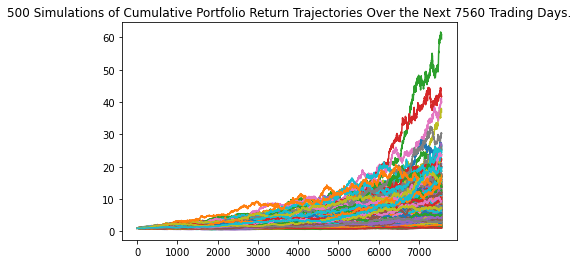

In [39]:
# Plot simulation outcomes
line_plot = MC_thirty_year.plot_simulation()

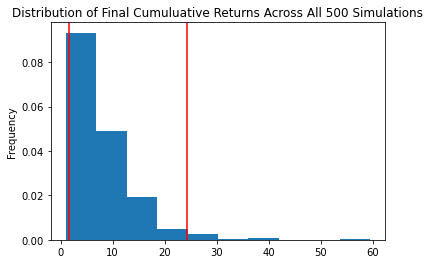

In [40]:
# Plot probability distribution and confidence intervals
dist_plot = MC_thirty_year.plot_distribution()

### Retirement Analysis

In [41]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl = MC_thirty_year.summarize_cumulative_return()

# Print summary statistics
print(tbl)

count           500.000000
mean              8.025787
std               6.231885
min               0.983875
25%               4.076519
50%               6.127792
75%              10.328542
max              59.546394
95% CI Lower      1.601535
95% CI Upper     24.241077
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [42]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(tbl[8] * initial_investment,2)
ci_upper = round(tbl[9] * initial_investment,2)


# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $32030.7 and $484821.54


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [43]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower = round(tbl[8] * initial_investment,2)
ci_upper = round(tbl[9] * initial_investment,2)


# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $48046.05 and $727232.3


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [44]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
MC_five_year = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.80,.20],
    num_simulation = 500,
    num_trading_days = 252 * 5
)


In [45]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
MC_five_year.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


c:\Users\tempe\OneDrive\Desktop\Finance-Planning\MCForecast.py:81: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.005522,0.997889,0.996042,1.001617,1.004330,0.994777,0.993171,0.999769,1.003633,1.000706,...,1.003497,0.998832,1.001851,1.001115,0.998125,1.000674,1.002546,0.996755,1.000344,0.995653
2,1.003068,1.000779,0.999872,0.999363,1.003520,0.990868,0.990543,1.000822,1.004437,0.999190,...,1.000460,0.998106,1.007210,1.002060,0.996360,1.004777,1.002344,1.001070,1.007148,0.998203
3,1.003000,1.000317,1.001468,0.997877,1.006231,0.988747,0.989521,1.003936,1.007980,1.001389,...,1.002218,1.001682,1.006804,1.001560,0.993239,0.996817,0.996367,1.003234,1.006629,1.000211
4,1.002463,0.997372,0.997202,0.998883,1.006629,0.986263,0.988286,1.003436,1.014233,1.002942,...,1.001543,0.997143,1.005259,1.009734,0.995023,0.994673,0.993593,1.003766,1.012950,0.997119
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,1.137705,1.104084,0.951041,1.056751,0.976778,0.970686,0.986311,1.069657,1.448181,1.001973,...,1.084502,1.194829,0.863037,0.752048,1.113653,1.193902,0.969606,1.060285,1.241618,1.049098
1257,1.139053,1.105038,0.950251,1.055239,0.977427,0.977282,0.985360,1.064477,1.448626,1.000700,...,1.082014,1.184057,0.863882,0.751495,1.114645,1.198783,0.968365,1.065997,1.242168,1.050538
1258,1.134734,1.104722,0.950926,1.057609,0.979662,0.978645,0.987857,1.070111,1.448056,0.999150,...,1.086339,1.188792,0.862648,0.748286,1.113327,1.198946,0.970112,1.067548,1.226165,1.051981
1259,1.137519,1.104738,0.953982,1.054178,0.985341,0.978059,0.995910,1.067345,1.446983,0.993557,...,1.084335,1.195889,0.868223,0.752507,1.111667,1.195743,0.971300,1.071523,1.225283,1.054783


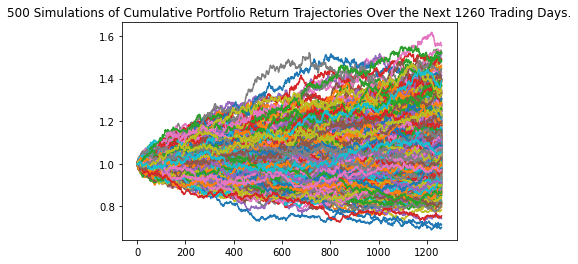

In [46]:
# Plot simulation outcomes
line_plot_five = MC_five_year.plot_simulation()

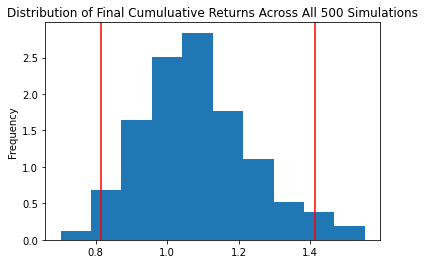

In [47]:
# Plot probability distribution and confidence intervals
dist_plot_five = MC_five_year.plot_distribution()

In [48]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl_five = MC_five_year.summarize_cumulative_return()

# Print summary statistics
print(tbl_five)

count           500.000000
mean              1.081475
std               0.152839
min               0.701898
25%               0.973725
50%               1.072069
75%               1.168297
max               1.553661
95% CI Lower      0.816113
95% CI Upper      1.413263
Name: 1260, dtype: float64


In [49]:
# Set initial investment
initial_investment = 20000 * 3

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_five = round(tbl_five[8] * initial_investment,2)
ci_upper_five = round(tbl_five[9] * initial_investment,2)


# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 5 years will end within in the range of $48966.76 and $84795.78


### Ten Years Retirement Option

In [50]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
MC_ten_year = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.80,.20],
    num_simulation = 500,
    num_trading_days = 252 * 10
)


In [51]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
MC_ten_year.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


c:\Users\tempe\OneDrive\Desktop\Finance-Planning\MCForecast.py:81: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.001408,1.001773,0.999588,1.000889,0.995621,0.998484,1.004433,1.002066,1.001281,1.002661,...,0.997988,1.000805,0.999743,0.994041,1.003777,1.003054,1.000356,1.002790,0.997655,0.995948
2,1.010165,1.006982,0.996980,0.997008,0.996027,1.003097,1.001515,1.004088,0.999705,1.000860,...,1.000681,1.006731,0.990602,0.990654,1.010679,1.005947,1.001033,0.995377,0.999544,0.991333
3,1.010387,1.012075,0.989868,0.998132,0.995142,1.000109,1.005788,1.012018,0.999741,1.001570,...,1.002804,0.998564,0.999517,0.993850,1.006476,1.001363,0.998141,0.994214,1.001757,0.990124
4,1.006557,1.019577,0.996854,0.998586,0.994193,0.996903,0.999862,1.008376,0.997401,0.999908,...,1.003870,1.001201,0.999974,1.003692,1.004197,1.000335,0.992946,0.994760,1.007572,0.984359
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,1.131865,1.175177,0.839742,1.462441,1.008116,0.989480,1.122844,1.042874,0.950615,1.230190,...,1.372685,1.019057,1.346905,1.017778,1.314331,1.050347,1.323830,1.287941,0.799405,1.344478
2517,1.129522,1.178362,0.841430,1.457440,1.012476,0.991251,1.124228,1.044249,0.950697,1.227142,...,1.383340,1.024078,1.341395,1.019673,1.322375,1.060173,1.317392,1.282118,0.799752,1.340107
2518,1.118714,1.175154,0.838301,1.462744,1.012066,0.993460,1.119859,1.050855,0.958878,1.228667,...,1.384165,1.021626,1.343239,1.019750,1.318586,1.062980,1.319393,1.286292,0.798831,1.337431
2519,1.116556,1.175763,0.839120,1.464399,1.014850,0.992986,1.117071,1.048049,0.961075,1.230955,...,1.377449,1.019467,1.335315,1.020265,1.324480,1.060737,1.324795,1.280084,0.798808,1.342720


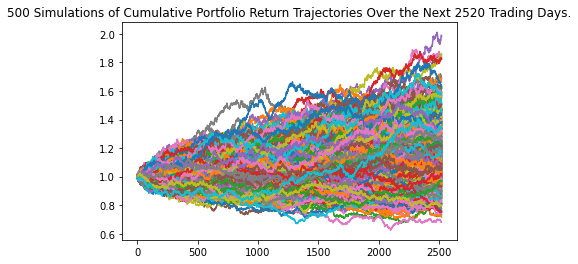

In [52]:
# Plot simulation outcomes
line_plot_ten = MC_ten_year.plot_simulation()

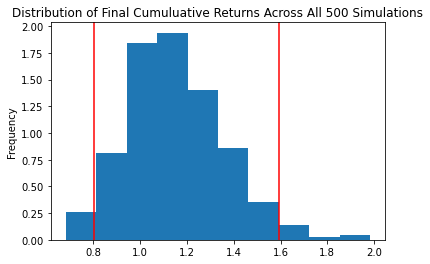

In [53]:
# Plot probability distribution and confidence intervals
dist_plot_ten = MC_ten_year.plot_distribution()

In [54]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl_ten = MC_ten_year.summarize_cumulative_return()

# Print summary statistics
print(tbl_ten)

count           500.000000
mean              1.149391
std               0.204520
min               0.683352
25%               1.005291
50%               1.127151
75%               1.262248
max               1.982717
95% CI Lower      0.804050
95% CI Upper      1.593174
Name: 2520, dtype: float64


In [55]:
# Set initial investment
initial_investment = 20000 * 3

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_ten = round(tbl_ten[8] * initial_investment,2)
ci_upper_ten = round(tbl_ten[9] * initial_investment,2)


# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 10 years will end within in the range of $48243.02 and $95590.45
